In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.animation
import pandas as pd
import numpy as np

In [2]:
# Simulation Parameters

N = 50
simTime = 5e7
tStep = 1e4 
nStep = int(np.ceil(simTime/tStep))

G = 6.67e-11
softning = 0.5

posData = np.zeros((nStep,N,3))
velData = np.zeros((nStep,N,3))
accData = np.zeros((nStep,N,3))

In [3]:
# Starting Conditions 
massLim = 10e30
posLim = 3e11
velLim = 10

massData = np.random.uniform(low= 0 ,high=massLim ,size = (N,))
posData = np.random.uniform(low=-posLim ,high=posLim ,size=(nStep,N,3))
velData = np.random.uniform(low=-velLim ,high=velLim ,size=(nStep,N,3))
accData = np.zeros((nStep,N,3))

# Sun,Earth TestCase
# massData = np.array([1.989e30,5.972e24])
# posData[0] = np.array([[0.,0.,0.],[1.496e11,0,0]])    #should be Nx3
# velData[0] = np.array([[0.,0.,0.],[0,2.978e4,0]])     #should be Nx3

In [4]:
def getEuclidianDist(pos1,pos2,returnDelta=False):
    dx = pos2[0] - pos1[0]
    dy = pos2[1] - pos1[1]
    dz = pos2[2] - pos1[2]
    r = ((dx**2)+(dy**2)+(dz**2))**0.5
    
    if returnDelta:
        return dx,dy,dz,r
    else:
        return r
    
def getAcc(i,mass,pos):  
    #TODO:Vectorise this operation if possible
    
    accDataTemp = np.zeros((N,3))
    for p1 in range(mass.shape[0]):
        Ftot = np.array([0,0,0])
        for p2 in range(mass.shape[0]):
#             print(pos)
            if p1!=p2:
                dx,dy,dz,r = getEuclidianDist(pos[p1],pos[p2],True)
                Fmag = G* mass[p1] * mass[p2]/(r**2)
                FVec = Fmag*np.array([dx,dy,dz]) / r
                Ftot = Ftot + FVec
        accTot = Ftot/mass[p1]
        
        accDataTemp[p1] = accTot 
    return accDataTemp

def solver():
    print("Simulation Started")
    t = 0
    i=0
    while t < simTime - tStep:
        currPos = posData[i]
        currVel = velData[i]
        currAcc = getAcc(i,massData,currPos)
        
        
#         ****Half Step Solver***

        v_half_step = currVel + (currAcc * tStep/2)
        p_half_step = currPos + (v_half_step * tStep /2 ) 
        
        a_full_step = getAcc(i,massData,p_half_step)
        v_full_step = v_half_step + (a_full_step*tStep/2)
        p_full_step = p_half_step + (v_full_step*tStep/2) 
    
        velData[i+1] = v_full_step
        posData[i+1] = p_full_step
        
        
#         ***Eularian Solver***

#          newVel = currVel  + (currAcc*tStep)
#          newPos = currPos + (newVel*tStep) + (0.5*currAcc*tStep**2)
#         velData[i+1] = newVel
#         posData[i+1] = newPos
        
        t = t + tStep
        i = i + 1
         
        
    print("Simulation Complete.")

In [5]:
solver()

Simulation Started
Simulation Complete.


In [6]:
pos = posData
pos

array([[[ 2.56171949e+11, -3.41965564e+10, -2.61568123e+11],
        [-1.83415540e+11,  1.90233357e+11, -2.66612603e+11],
        [ 1.15275743e+11, -3.16762831e+10,  7.34411682e+10],
        ...,
        [ 2.42341615e+11,  8.37777251e+10, -6.67860405e+10],
        [-2.93283864e+11, -1.36580377e+11, -2.59453424e+11],
        [-8.58750478e+10,  6.46576272e+09, -3.82897677e+10]],

       [[ 2.56167647e+11, -3.41948911e+10, -2.61562872e+11],
        [-1.83411169e+11,  1.90230872e+11, -2.66605618e+11],
        [ 1.15276053e+11, -3.16744647e+10,  7.34409710e+10],
        ...,
        [ 2.42315598e+11,  8.37855642e+10, -6.67816903e+10],
        [-2.93276945e+11, -1.36580322e+11, -2.59449602e+11],
        [-8.58702611e+10,  6.46892734e+09, -3.82853103e+10]],

       [[ 2.56157719e+11, -3.41911141e+10, -2.61550601e+11],
        [-1.83400878e+11,  1.90224956e+11, -2.66589353e+11],
        [ 1.15276813e+11, -3.16700960e+10,  7.34406054e+10],
        ...,
        [ 2.42254829e+11,  8.38037452e+10,

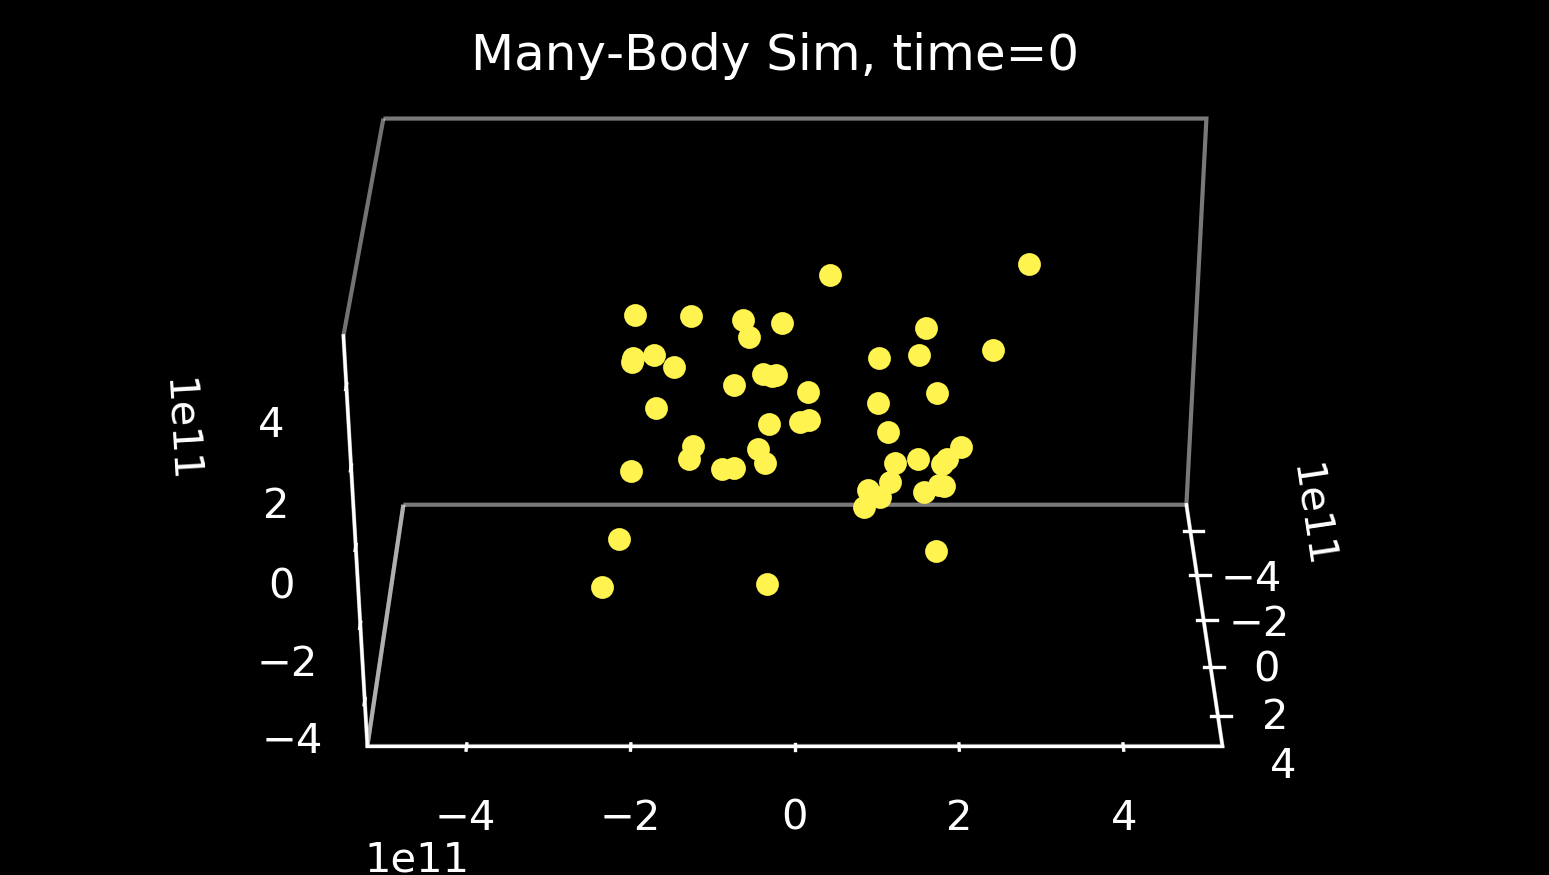

In [7]:
# Visualiser

plt.style.use('dark_background')
dpi = 300
resolution = 1080
fig = plt.figure(figsize=(resolution*1.78/dpi, resolution/dpi), dpi=dpi)
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=30, azim=0)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

lim = 5e11

ax.set_ylim(-lim,lim)
ax.set_xlim(-lim,lim)
ax.set_zlim(-lim,lim)

# Now set color to white (or whatever is "invisible")

# Bonus: To get rid of the grid as well:
ax.grid(False)


title = ax.set_title('3D Test')
scatters = [ax.scatter(pos[0,l,0:1],pos[0,l,1:2],pos[0,l,2:],c="#fff44f",) for l in range(pos.shape[1])]
# scat = ax.scatter(pos[:,0,0],pos[:,1,0],pos[:,2,0])
iterations = pos.shape[0]

def animate(i, pos, scatters):
    title.set_text('Many-Body Sim, time={}'.format(i))
    ax.view_init(azim=i*2*36/pos.shape[0])
    for particle in range(pos.shape[1]):
        scatters[particle]._offsets3d = (pos[i,particle,0:1],pos[i,particle,1:2],pos[i,particle,2:])
    return scatters
    
ani = matplotlib.animation.FuncAnimation(fig, animate, iterations, fargs=(pos, scatters),
                                       interval=50) 

f = r"animation.mp4" 
writervideo = matplotlib.animation.FFMpegWriter(fps=20) 
ani.save(f, writer=writervideo)

 